In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics


In [106]:
data = pd.read_csv(r'C:\Users\xyush\Downloads\updated_data.csv')

In [107]:
print(data)

      Cement   Slag    Ash  Water  Plast  Coarse   Fine  Days    Mpa    WC
0      141.3  212.0    0.0  203.5    0.0   971.8  748.5    28  29.89  1.44
1      168.9   42.2  124.3  158.3   10.8  1080.8  796.2    14  23.51  0.94
2      250.0    0.0   95.7  187.4    5.5   956.9  861.2    28  29.22  0.75
3      266.0  114.0    0.0  228.0    0.0   932.0  670.0    28  45.85  0.86
4      154.8  183.4    0.0  193.3    9.1  1047.4  696.7    28  18.29  1.25
...      ...    ...    ...    ...    ...     ...    ...   ...    ...   ...
2055   276.4  116.0   90.3  179.6    8.9   870.1  768.3    28  44.28  0.37
2056   322.2    0.0  115.6  196.0   10.4   817.9  813.4    28  31.18  0.45
2057   148.5  139.4  108.6  192.7    6.1   892.4  780.0    28  23.70  0.49
2058   159.1  186.7    0.0  175.6   11.3   989.6  788.9    28  32.77  0.51
2059   260.9  100.5   78.3  200.6    8.6   864.5  761.5    28  32.40  0.46

[2060 rows x 10 columns]


Now all we will be doing is to generalize the data and get familiar with it and do data filtering & cleaning.

In [111]:
df = pd.DataFrame(data)
# Counting zero or any non-assigned values
for column in df.columns:
    zero_count = (df[column] == 0).sum()
    print(f"Number of zero entries for {column}: {zero_count}")

Number of zero entries for Cement: 0
Number of zero entries for Slag: 942
Number of zero entries for Ash: 1132
Number of zero entries for Water: 0
Number of zero entries for Plast: 758
Number of zero entries for Coarse: 0
Number of zero entries for Fine: 0
Number of zero entries for Days: 0
Number of zero entries for Mpa: 0
Number of zero entries for WC: 0


In [113]:
stats_summary = df.agg(['mean', 'median', 'std'])

# Print values to check for variation using standard method
for column in df.columns:
    print(f"\nStatistics for {column}:")
    print(f"Mean: {df[column].mean():.2f}")
    print(f"Median: {df[column].median():.2f}")
    print(f"Standard Deviation: {df[column].std():.2f}")


Statistics for Cement:
Mean: 281.17
Median: 272.90
Standard Deviation: 104.48

Statistics for Slag:
Mean: 73.90
Median: 22.00
Standard Deviation: 86.26

Statistics for Ash:
Mean: 54.19
Median: 0.00
Standard Deviation: 63.98

Statistics for Water:
Mean: 181.57
Median: 185.00
Standard Deviation: 21.35

Statistics for Plast:
Mean: 6.20
Median: 6.40
Standard Deviation: 5.97

Statistics for Coarse:
Mean: 972.92
Median: 968.00
Standard Deviation: 77.74

Statistics for Fine:
Mean: 773.58
Median: 779.50
Standard Deviation: 80.16

Statistics for Days:
Mean: 45.66
Median: 28.00
Standard Deviation: 63.15

Statistics for Mpa:
Mean: 35.82
Median: 34.45
Standard Deviation: 16.70

Statistics for WC:
Mean: 0.61
Median: 0.55
Standard Deviation: 0.28


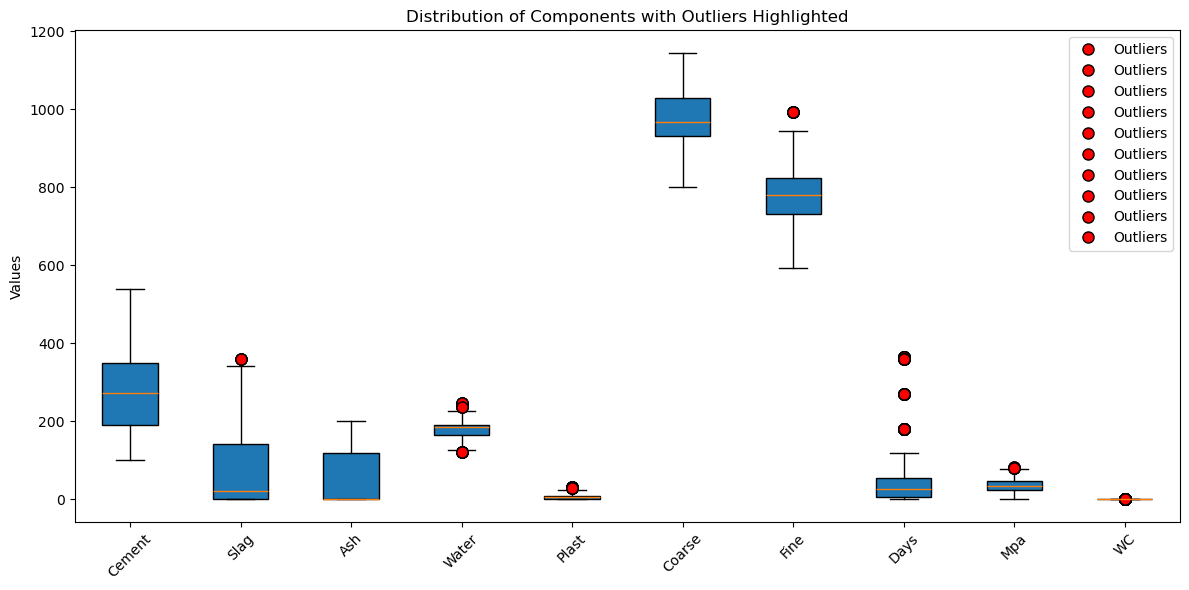


Outliers in Slag:
918     359.4
990     359.4
1583    359.4
1589    359.4
Name: Slag, dtype: float64

Outliers in Water:
66      247.0
263     246.9
432     121.8
462     121.8
587     121.8
740     237.0
789     121.8
826     236.7
914     121.8
1254    121.8
1255    121.8
1256    121.8
1257    121.8
1258    121.8
1892    237.0
1903    247.0
1966    246.9
2049    236.7
Name: Water, dtype: float64

Outliers in Plast:
44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
1106    32.2
1109    28.2
1129    32.2
1132    28.2
1152    32.2
1155    28.2
1175    32.2
1178    28.2
1198    32.2
1201    28.2
Name: Plast, dtype: float64

Outliers in Fine:
129     992.6
447     992.6
504     992.6
584     992.6
857     992.6
1104    992.6
1127    992.6
1150    992.6
1173    992.6
1196    992.6
Name: Fine, dtype: float64

Outliers in Days:
51      180
64      365
93      180
99      180
103     180
       ... 
1828    270
1

In [115]:
#Finding out outliers in each section helps us to visualize our data more carefully
plt.figure(figsize=(12, 6))

# Create box plot
bp = plt.boxplot(df.values, tick_labels=df.columns, patch_artist=True)

# Customize outlier points for better visibility
for flier in bp['fliers']:
    flier.set(marker='o', 
              markerfacecolor='red',
              markersize=8,
              label='Outliers')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Distribution of Components with Outliers Highlighted')
plt.ylabel('Values')

# Add legend for outliers only
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

# If you want to see the actual outlier values:
for column in df.columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    if len(outliers) > 0:
        print(f"\nOutliers in {column}:")
        print(outliers)

We are now applying filter to certain features to remove outliers, here outliers are considered on being too far from normal ones: We will be removing superplasticizers values above 25, slag values above 310 and amount of water which exceeds 230 kg/m3 in volume from the original data.

In [193]:
# Display initial data stats
print("Original data shape:", df.shape)

# Pre-filter analysis
print("\n--- Problematic Entries ---")
print("Samples with Slag > 300:")
print(df.loc[df['Slag'] > 300])
print("\nSamples with Plast > 25:")
print(df.loc[df['Plast'] > 25])
print("\nSamples with Water > 230:")
print(df.loc[df['Water'] > 230])

# Create combined filter (keep rows that satisfy ALL conditions)
valid_rows = (
    (df['Slag'] <= 300) & 
    (df['Plast'] <= 25) & 
    (df['Water'] <= 230)
)

# Apply filters
df_cleaned = df[valid_rows].copy()

# Display filtering results
print(f"\n--- Filtering Results ---")
print(f"Original rows: {len(df)}")
print(f"Removed rows: {len(df) - len(df_cleaned)}")
print(f"New data shape: {df_cleaned.shape}")
# Save cleaned data
df_cleaned.to_csv('filtered_concrete_data.csv', index=False)
print("\nFiltered data saved successfully!")

Original data shape: (2060, 11)

--- Problematic Entries ---
Samples with Slag > 300:
      Cement   Slag  Ash  Water  Plast  Coarse   Fine  Days    Mpa    WC  \
21     228.0  342.1  0.0  185.7    0.0   955.8  674.3     7  21.92  0.81   
285    203.5  305.3  0.0  203.5    0.0   963.4  630.0    90  51.86  1.00   
405    203.5  305.3  0.0  203.5    0.0   963.4  630.0    28  41.68  1.00   
516    203.5  305.3  0.0  203.5    0.0   963.4  630.0     7  19.54  1.00   
564    228.0  342.1  0.0  185.7    0.0   955.8  674.3    28  39.70  0.81   
603    210.7  316.1  0.0  185.7    0.0   977.0  689.3     7  21.82  0.88   
737    210.7  316.1  0.0  185.7    0.0   977.0  689.3    28  37.81  0.88   
918    239.6  359.4  0.0  185.7    0.0   941.6  664.3    28  39.44  0.78   
990    239.6  359.4  0.0  185.7    0.0   941.6  664.3     7  25.42  0.78   
1021   203.5  305.3  0.0  203.5    0.0   963.4  630.0     3   9.56  1.00   
1583   239.6  359.4  0.0  185.7    0.0   941.6  664.3     7  25.42  0.31   
15

We successfully cleaned some outliers from our data and prepared the remaining data to train the model. We now move to next stage showing correlation between different parameters and graphical representation of the data.

In [204]:
data = pd.read_csv(r"C:\Users\xyush\PycharmProjects\Cement_analysis\filtered_concrete_data.csv")
df = pd.DataFrame(data)

We could plot different graphs, to know more in detail how the independent variables are affecting strength of concrete in the following sections.

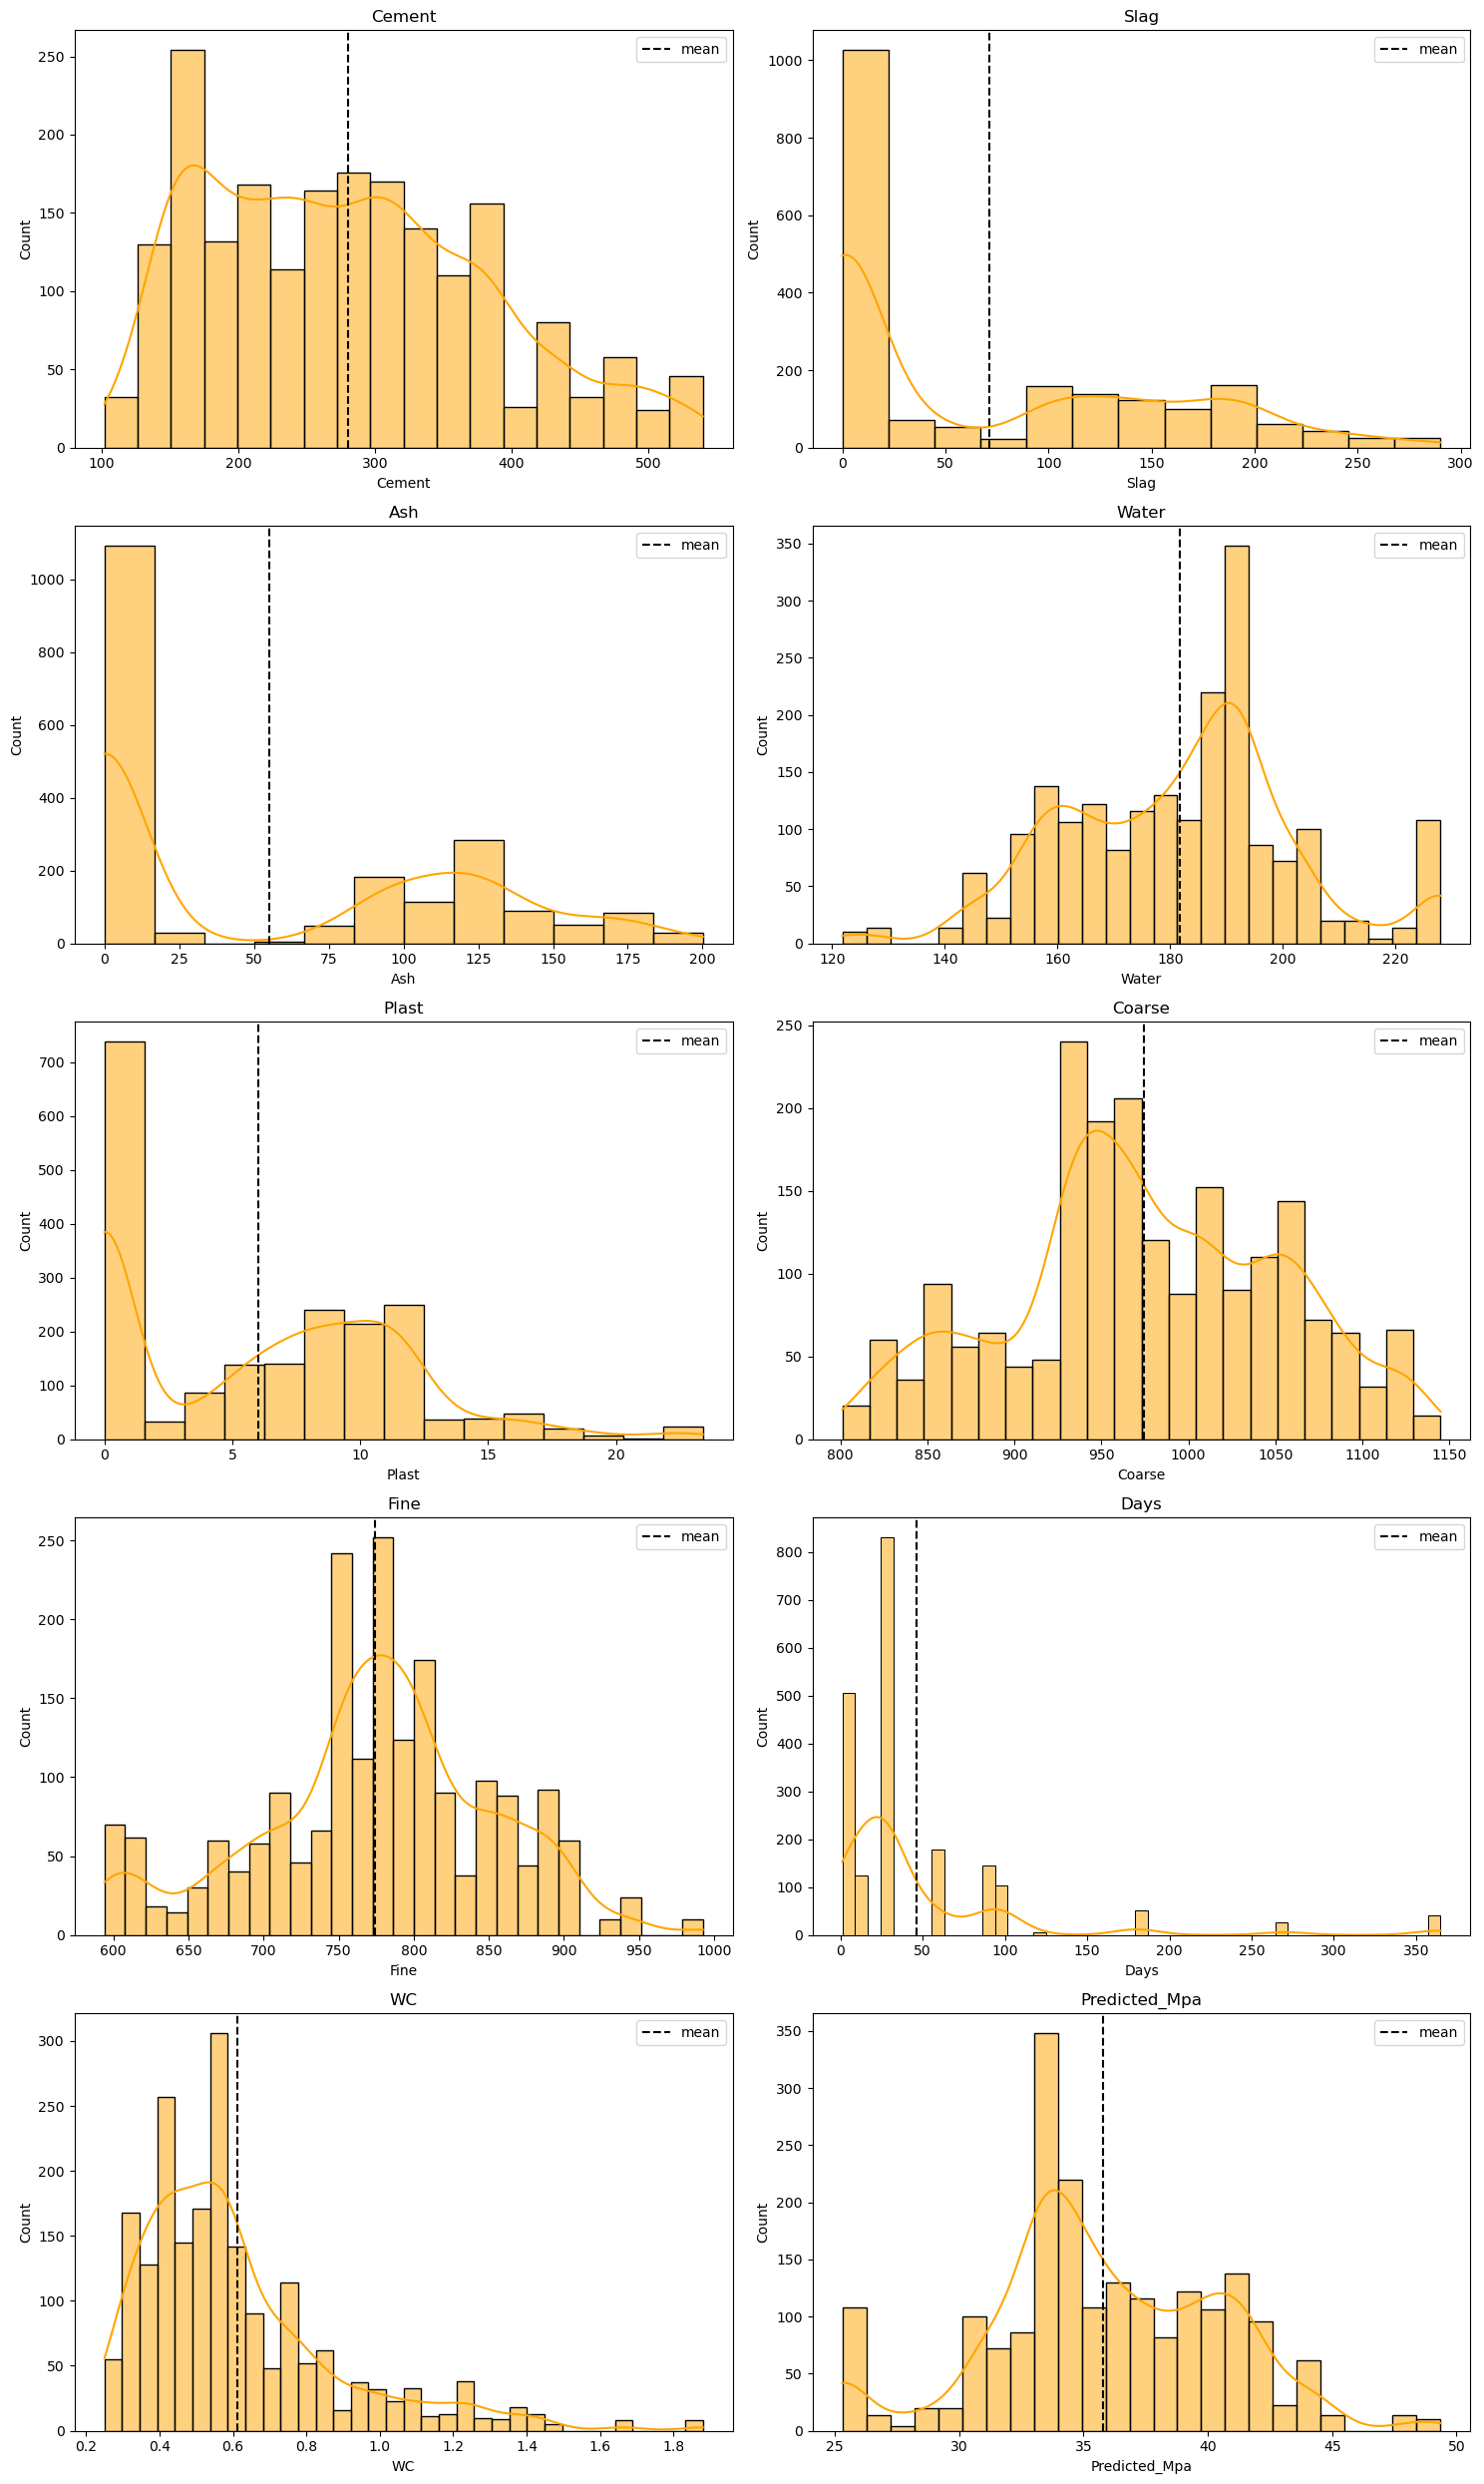

In [358]:
import math

num_plots = len(cols)
nrows = math.ceil(num_plots / 2)  # Calculate rows, rounding up
ncols = 2  # Keep two columns

fig = plt.figure(figsize=(15, 5 * nrows)) # Adjust figure height dynamically

for j, i in enumerate(cols):
    plt.subplot(nrows, ncols, j + 1)
    ax = sns.histplot(data[i], color='orange', kde=True)
    plt.axvline(data[i].mean(), linestyle="dashed", label="mean", color='black')
    plt.title(i) # Add a title to each subplot (good practice)
    plt.legend() # Show the legend

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()


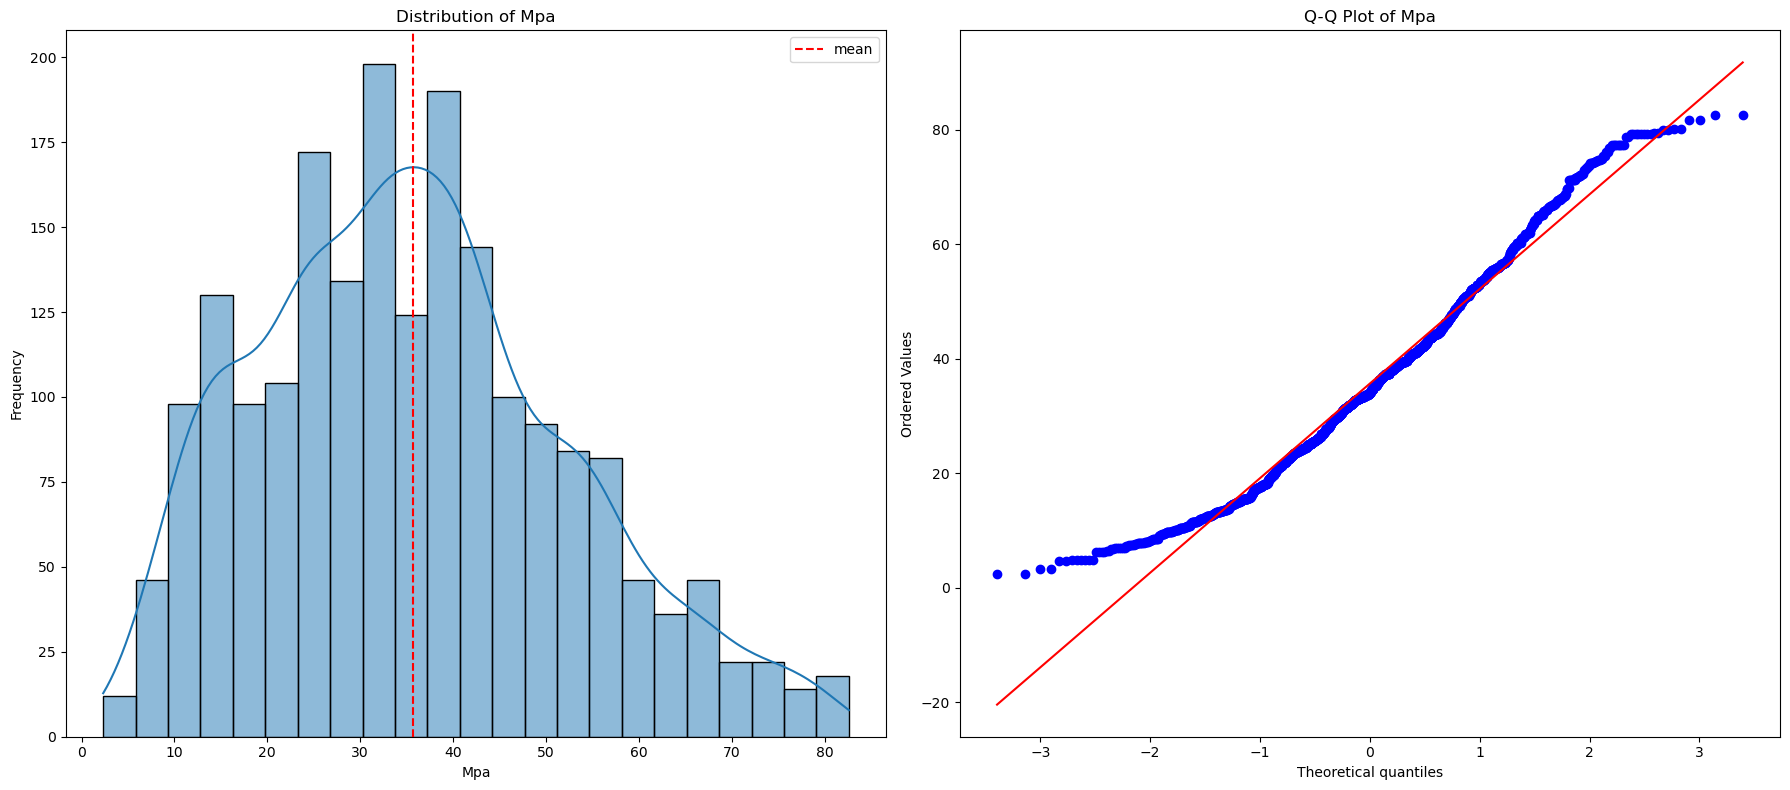

In [365]:
import seaborn as sns
import scipy.stats as stats  # For Q-Q plot 
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # Create two subplots side by side
# Histogram/KDE
sns.histplot(data.Mpa, kde=True, ax=axes[0])
axes[0].axvline(data.Mpa.mean(), linestyle="dashed", label="mean", color='red')
axes[0].set_xlabel("Mpa")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Mpa")
axes[0].legend()
# Q-Q Plot
stats.probplot(data.Mpa, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of Mpa")
plt.tight_layout() # Prevent overlapping of subplots
plt.show()


The strength data is normally distributed as seen from above graph.

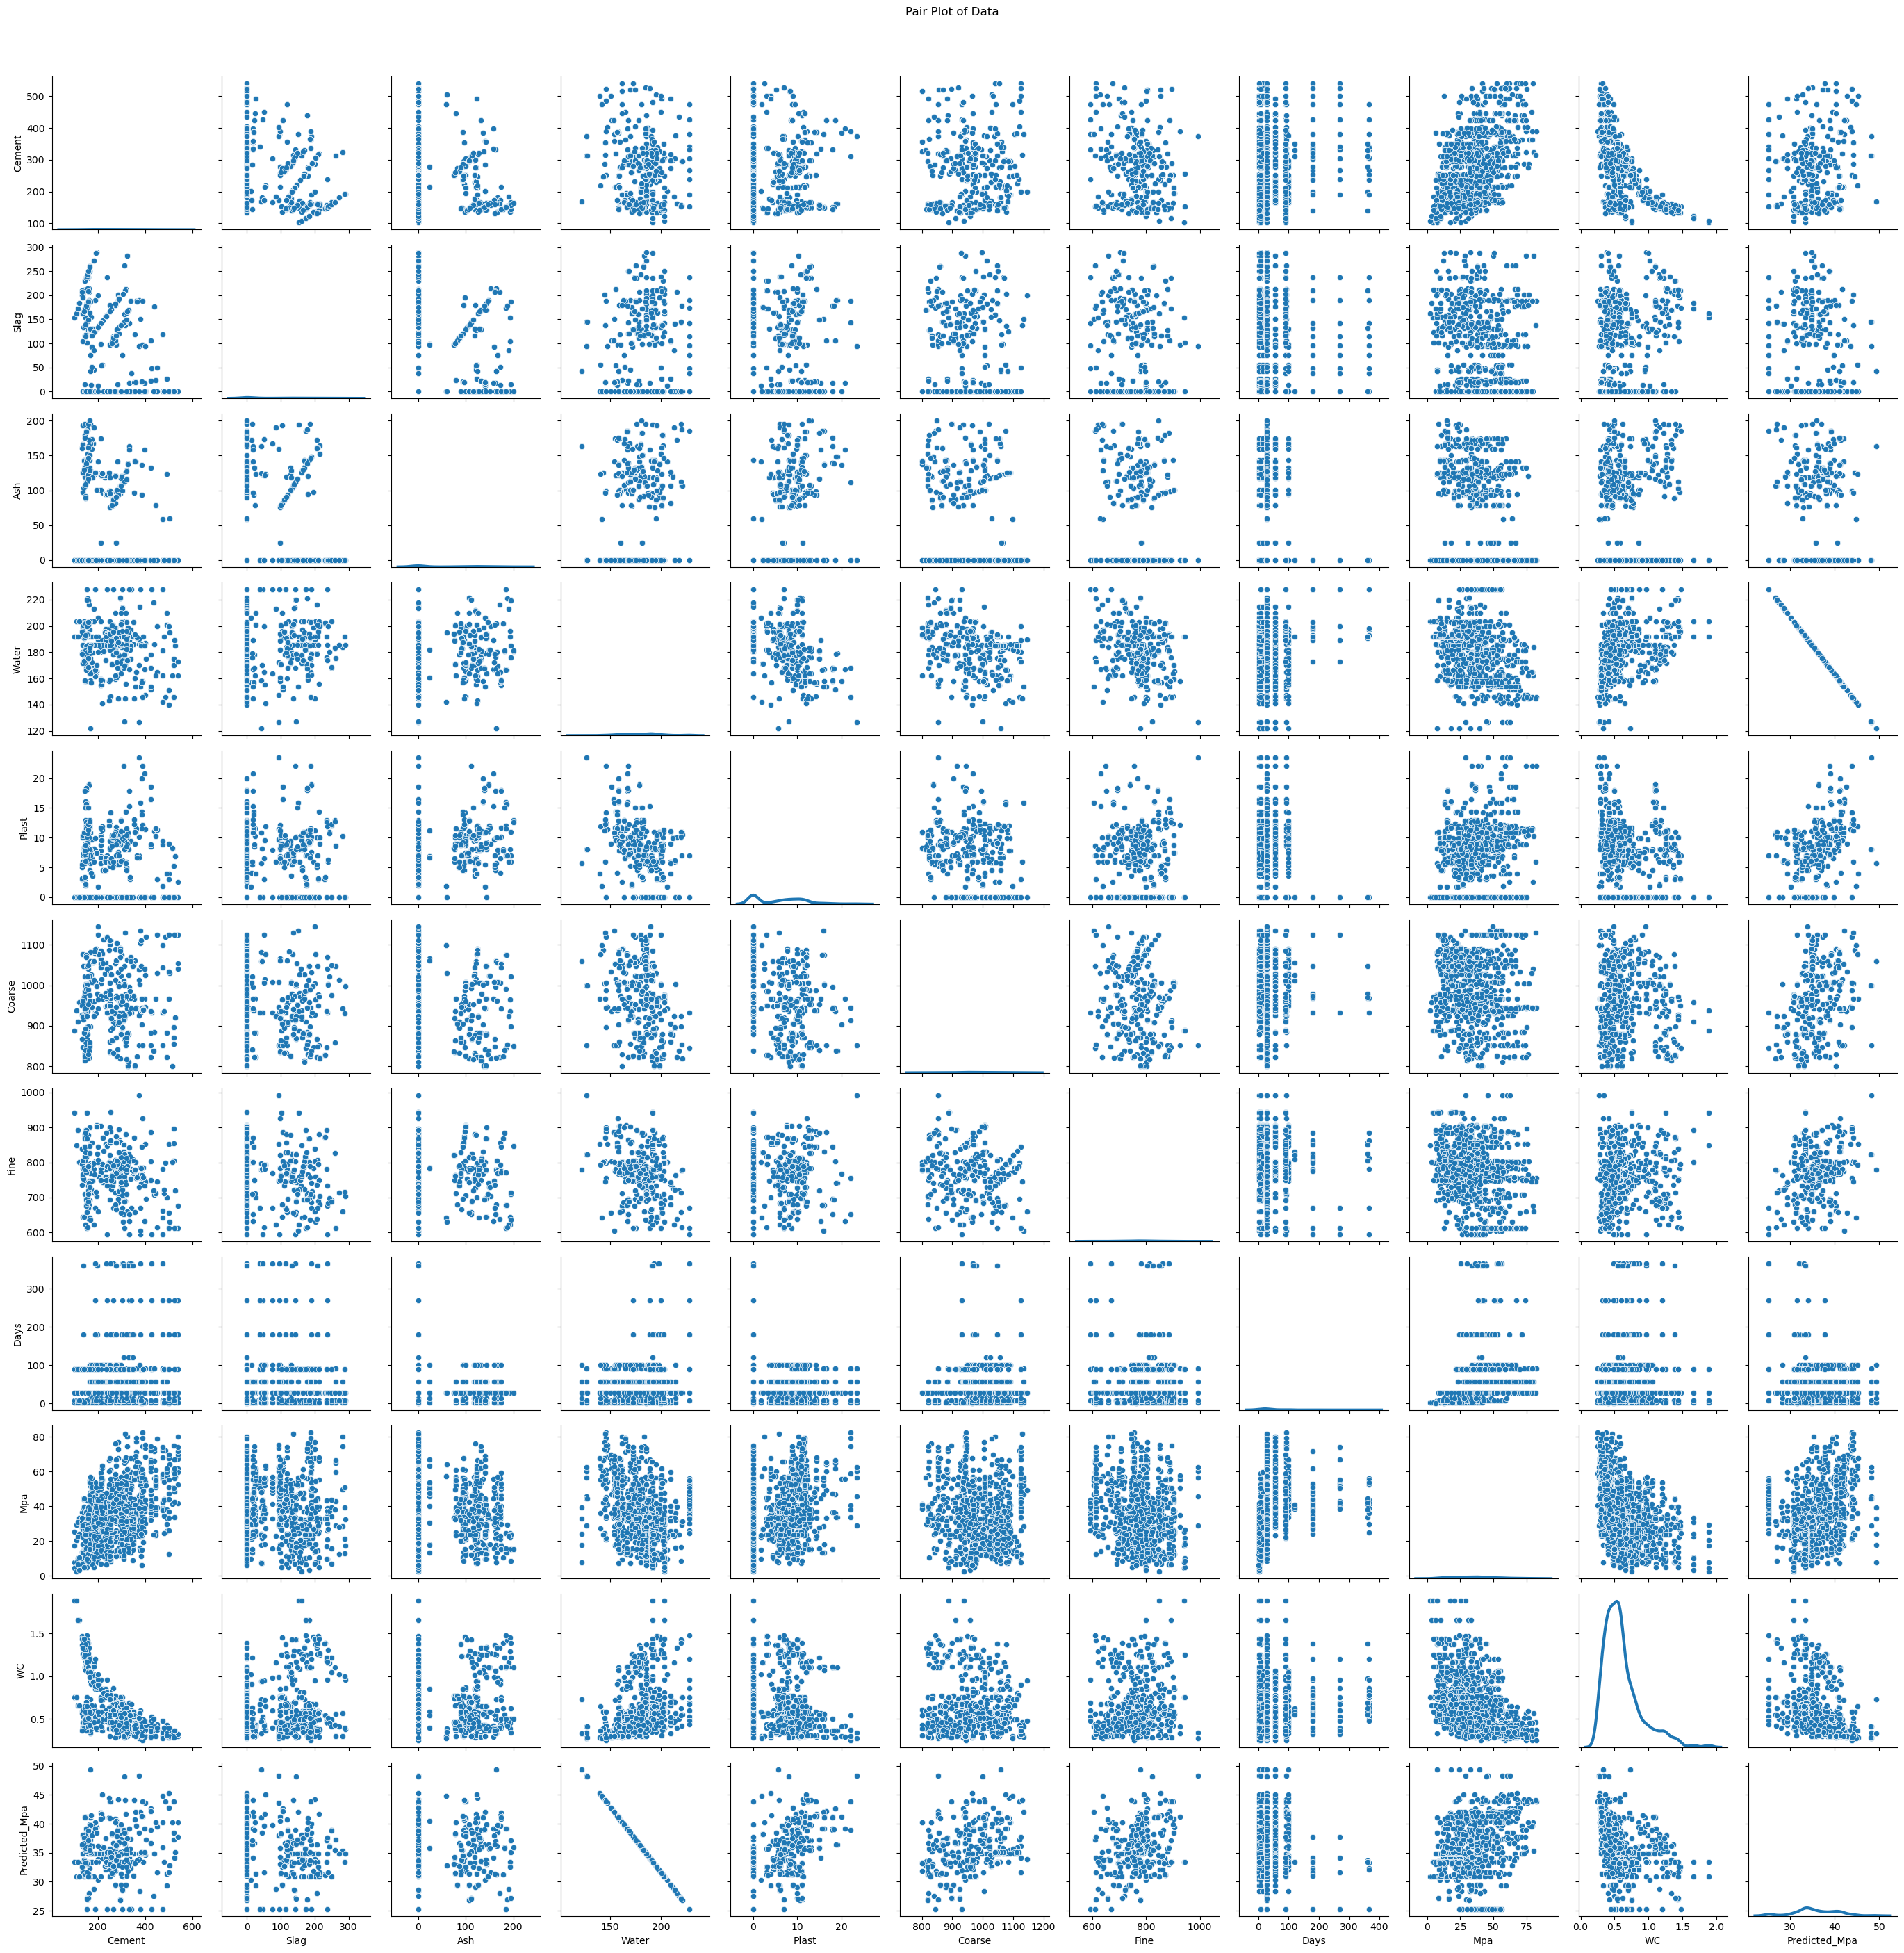

In [370]:
#pair plot
data_cleaned = data.dropna()  # Handle missing data (crucial!)

g = sns.PairGrid(data_cleaned)

g.map_upper(sns.scatterplot)  # Scatter plot in the upper triangle
g.map_lower(sns.scatterplot)  # Scatter plot in the lower triangle (much better!)
g.map_diag(sns.kdeplot, lw=3)  # KDE plot on the diagonal (no legend here)

# Add titles and labels (important!)
g.fig.suptitle("Pair Plot of Data", y=1.02)  # Adjust 'y' for title position

# Improve axis labels (more descriptive)
for i in range(len(data_cleaned.columns)):
    g.axes[i, 0].set_ylabel(data_cleaned.columns[i])  # Y-axis labels
    g.axes[-1, i].set_xlabel(data_cleaned.columns[i]) # X-axis labels (only on the last row)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

The observation cans be shown to display how each parameters are related with other, for instance, strong correlation between cement and strength can be seen, with days following it. Similarly, water and strength have negative correlation, water and superplasticizer are having a negative correlation. 

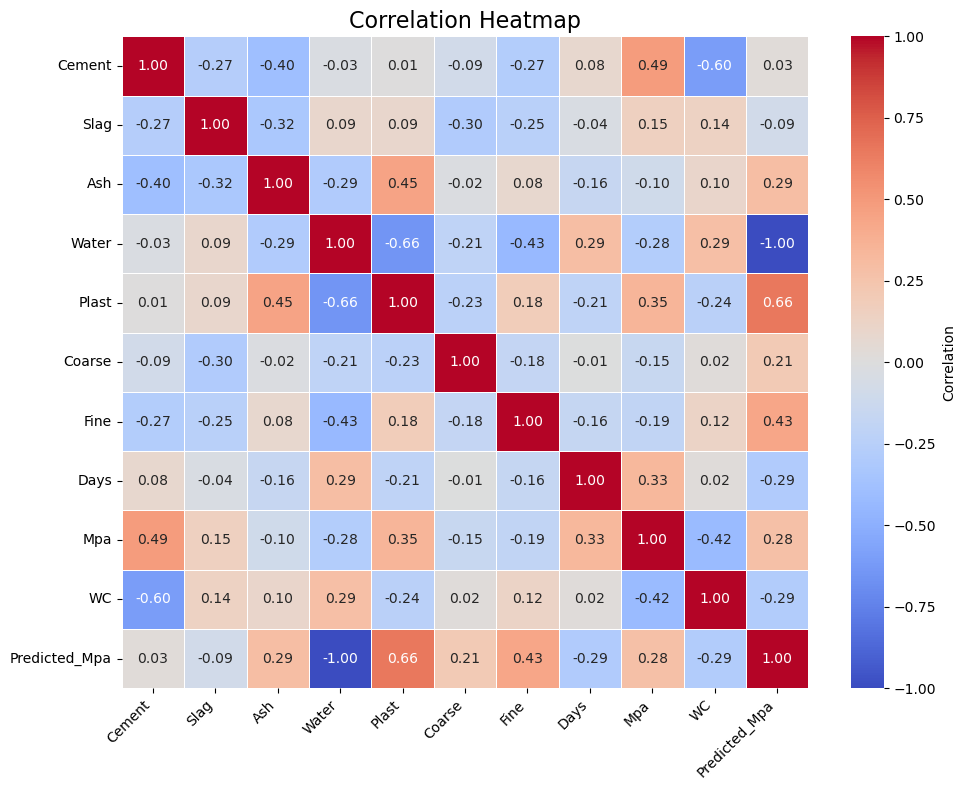

In [374]:
import seaborn as sns

corr_matrix = data.corr()  # Calculate the correlation matrix (

plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation'}) # Customize

plt.title("Correlation Heatmap", fontsize=16)  # Add a title
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels if needed
plt.yticks(rotation=0, fontsize=10)  # Rotate y-axis labels if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

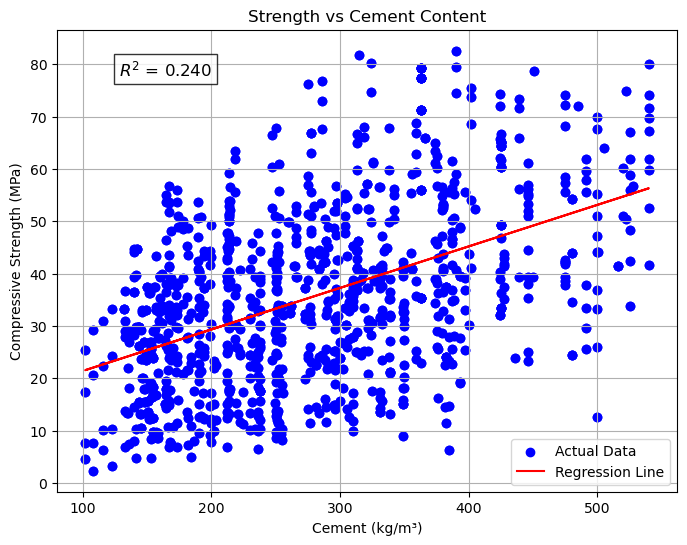

In [208]:
#Plotting strength vs cement relation
X=df[['Cement']]
y=df['Mpa']
model = LinearRegression()
model.fit(X,y)
r_squared = model.score(X, y)
df["Predicted_Mpa"] = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(df["Cement"], df["Mpa"], color="blue", label="Actual Data")
plt.plot(df["Cement"], df["Predicted_Mpa"], color="red", label="Regression Line")
plt.title("Strength vs Cement Content")
plt.xlabel("Cement (kg/m³)")
plt.ylabel("Compressive Strength (MPa)")
plt.legend()
plt.grid(True)
#Adding R2 value to the curve to show the how much trendline is representing the exact values
plt.text(
    0.1, 0.9, f"$R^2$ = {r_squared:.3f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
)
plt.show()


There is a positive correlation between cement content and compressive strength. As the cement content increases, the compressive strength generally increases. The scatter of data points around the regression line indicates variability in strength for similar cement content. This suggests other factors, like water content, aggregate type, and curing conditions, are also influencing compressive strength. At higher cement content levels (e.g., above 400 kg/m³), the increase in strength appears less significant, which may indicate diminishing returns, where adding more cement doesn't proportionally increase strength due to factors like excess heat of hydration, microcracking, or different water-to-cement ratios. Also, the regression line doesn't truely represent the data points(low R2 value).

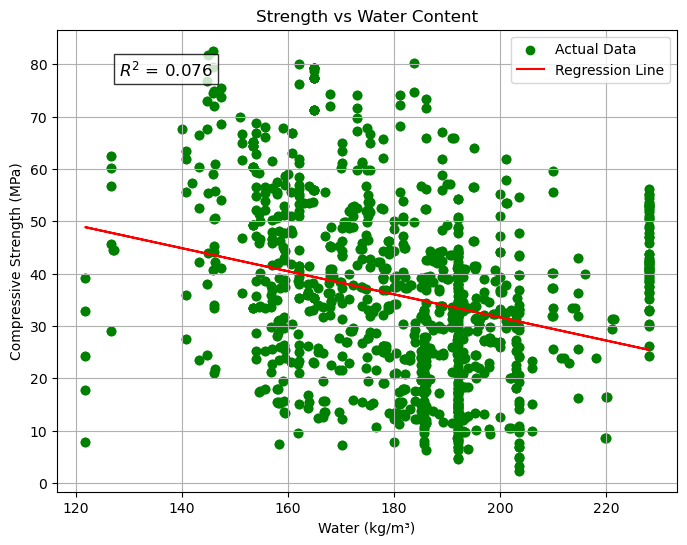

In [211]:
#Plotting strength vs water relation
X=df[['Water']]
y=df['Mpa']
model = LinearRegression()
model.fit(X,y)
r_squared = model.score(X, y)
df["Predicted_Mpa"] = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(df["Water"], df["Mpa"], color="green", label="Actual Data")
plt.plot(df["Water"], df["Predicted_Mpa"], color="red", label="Regression Line")
plt.title("Strength vs Water Content")
plt.xlabel("Water (kg/m³)")
plt.ylabel("Compressive Strength (MPa)")
plt.legend()
plt.grid(True)
#Adding R2 value to the curve to show the how much trendline is representing the exact values
plt.text(
    0.1, 0.9, f"$R^2$ = {r_squared:.3f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
)
plt.show()

We can see from above plot that there is a negative correlation between water content and compressive strength, as indicated by the downward slope of the regression line. This perfectly aligns with higher water content in the mix generally reduces the strength of concrete because of increased porosity. We can also intrepret that water content above 220(kg/m3) show more dispersion and relatively lower strength values, some kind of threshold can be put at this boundary.

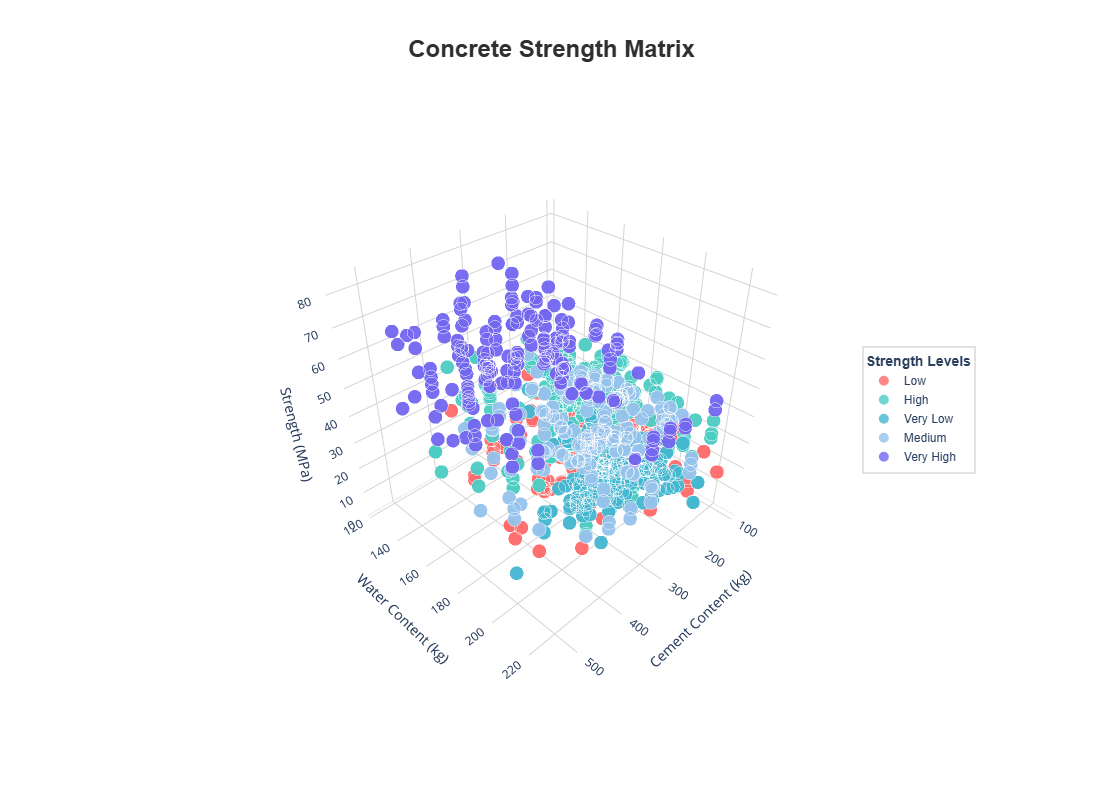

In [234]:
import plotly.express as px
import numpy as np

def create_stylish_viz(df):
    # Create strength categories for legend
    df['Strength_Category'] = pd.qcut(df['Mpa'], 
                                    q=5, 
                                    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Custom color scale
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96C3EB', '#7367F0']
    
    fig = px.scatter_3d(df,
                        x='Cement',
                        y='Water',
                        z='Mpa',
                        color='Strength_Category',
                        color_discrete_sequence=colors,
                        title='Concrete Strength Analysis',
                        width=1200,
                        height=800,
                        size_max=15)

    # Enhanced layout
    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        title=dict(
            text='<b>Concrete Strength Matrix</b>',
            font=dict(size=24, family='Arial', color='#2f2f2f'),
            x=0.5,
            y=0.95
        ),
        scene=dict(
            xaxis_title='Cement Content (kg)',
            yaxis_title='Water Content (kg)',
            zaxis_title='Strength (MPa)',
            xaxis=dict(gridcolor='lightgrey', showbackground=True, backgroundcolor='white'),
            yaxis=dict(gridcolor='lightgrey', showbackground=True, backgroundcolor='white'),
            zaxis=dict(gridcolor='lightgrey', showbackground=True, backgroundcolor='white')
        ),
        scene_camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=1.5, y=1.5, z=1.5)
        ),
        # Stylish legend
        showlegend=True,
        legend=dict(
            title=dict(
                text='<b>Strength Levels</b>',
                font=dict(size=14, family='Arial')
            ),
            bgcolor='rgba(255, 255, 255, 0.9)',
            bordercolor='#E2E2E2',
            borderwidth=2,
            itemsizing='constant',
            itemwidth=30,
            x=0.95,
            y=0.5,
            xanchor='right',
            yanchor='middle',
            font=dict(size=12, family='Arial'),
            orientation='v'
        )
    )

    # Enhanced markers
    fig.update_traces(
        marker=dict(
            size=8,
            opacity=0.8,
            line=dict(width=1, color='white'),
            symbol='circle'
        ),
        selector=dict(mode='markers')
    )

    return fig

# Create and display the visualization
fig = create_stylish_viz(df)
fig.show()

In [236]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
features = ['Cement', 'Slag', 'Ash', 'Water', 'Plast', 'Coarse', 'Fine', 'Days', 'WC']
X = df.loc[:, features]
y = df.loc[:,'Mpa']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0, train_size=0.8)
model_R = RandomForestRegressor(n_estimators=100)
model_R.fit(X_train, y_train)
# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model_R.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

RMSE: 4.195488094176597
R²: 0.932453573391215


In [238]:
#  Now lets find out the error in training and ways to minimize that error for better performance by our model.
#Fitting the scaler on the training data only and apply it to both training and test sets to avoid data leakage
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, learning_curve
# Initialize scaler
scaler = StandardScaler()
# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler for test data
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
# Use regression metrics (MSE, MAE, R²)
cv_scores = cross_val_score(
    model, 
    X_train_scaled, y_train, 
    cv=5, 
    scoring='neg_mean_squared_error'  # Common for regression
)

# Convert negative MSE to positive
mse_scores = -cv_scores
print(f"CV MSE: {mse_scores.mean():.2f} (±{mse_scores.std():.2f})")

CV MSE: 108.54 (±11.54)


Initial Model Evaluation:
Cross-validation RMSE: 3.20 (±1.56)


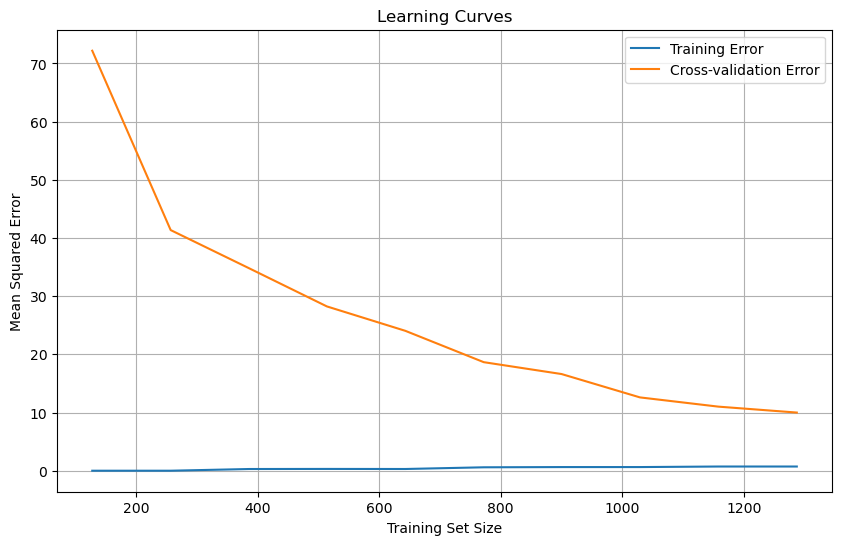

In [240]:
# Using pipelines and scaler techniques 
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Creating pipelines
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])
#Plot learning curves
def plot_learning_curves(pipeline, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        pipeline, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error'
    )
    train_mse = -train_scores.mean(axis=1)
    val_mse = -val_scores.mean(axis=1)
    #Configure the graph style and adding details
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mse, label='Training Error')
    plt.plot(train_sizes, val_mse, label='Cross-validation Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.show()
#Model Evaluation
print("Initial Model Evaluation:")
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, 
                           scoring='neg_mean_squared_error')
print(f"Cross-validation RMSE: {np.sqrt(-cv_scores.mean()):.2f} (±{np.sqrt(cv_scores.std()):.2f})")
# Plot initial learning curves
plot_learning_curves(pipeline, X_train, y_train)

Training Error v/s Cross Validation error
If the training error is low but the cross-validation error is high, the model is overfitting. If both errors are high, the model is underfitting (too simple to capture patterns).
From the learning curves graph shown, we can interpret several important aspects about the model's performance:
Gap Between Training and Cross-validation Error:
    There's a significant gap between training error (blue line) and cross-validation error (orange line). This gap indicates overfitting - the model performs much better on training data than on unseen data. The model has high variance, meaning it's too complex for the current dataset.
High training performance (low blue line) but poorer generalization (high orange line), This model shows significant gap between training and cross-validation which can be improve by using another algorithms, increasing the regularization, reducing model complexity or more training data. So, let's evaluate our model and try different ways to fix the issue.


In [242]:
#Hyperparameter tunning
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
# Print results and evaluate final model
print("\nBest Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
# Training error
y_train_pred = best_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
# Test error
y_test_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print("\nFinal Model Performance:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R²: {test_r2:.2f}")


Best Parameters: {'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0.2, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__min_child_weight': 3, 'xgb__n_estimators': 300, 'xgb__subsample': 0.9}

Final Model Performance:
Training RMSE: 1.23
Training R²: 0.99
Test RMSE: 3.41
Test R²: 0.96


From the above data, we can see the parameters of model in which it performs the best, and we could also see the training and test performance by the model.

Random Forest Results:
Best Parameters: {'rf__max_depth': 15, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Training RMSE: 1.43
Test RMSE: 3.80


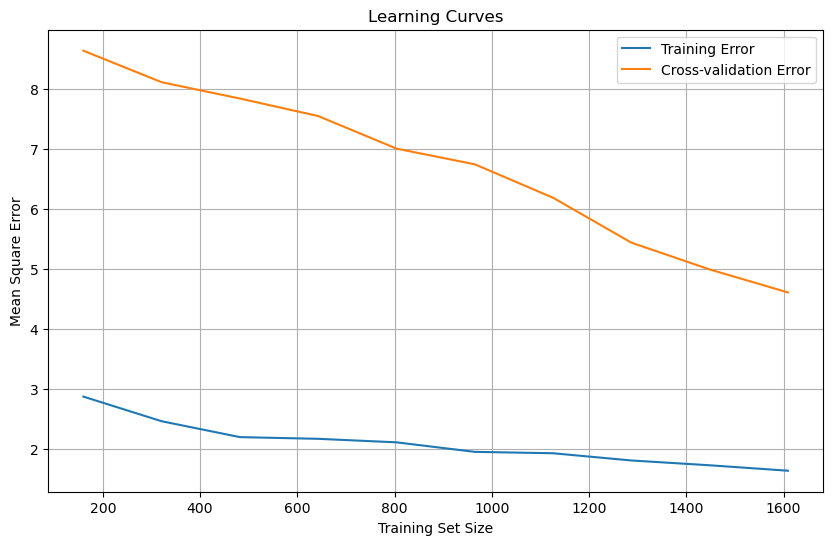

In [258]:
# Using RandomForestRegressor with regularization parameters

# Create pipeline with regularized RandomForest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        max_depth=15,           # Limit tree depth
        min_samples_split=2,    # Minimum samples required to split
        min_samples_leaf=1,     # Minimum samples in leaf nodes
        max_features='sqrt',    # Limit features considered at each split
        random_state=42
    ))
])
# Grid search for optimal regularization parameters
param_grid_rf = {
    'rf__max_depth': [5, 10, 15],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__n_estimators': [100, 200]
}
# Function to evaluate model with cross-validation
def evaluate_model(pipeline, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)
    best_model = grid_search.best_estimator_
    # Training error
    train_pred = best_model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    # Test error
    test_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    print(f"Training RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    return best_model
print("Random Forest Results:")
rf_model = evaluate_model(pipeline_rf, param_grid_rf, X_train, y_train, X_test, y_test)
# Plot learning curves for best model
def plot_learning_curves(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error'
    )
    
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    val_rmse = np.sqrt(-val_scores.mean(axis=1))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_rmse, label='Training Error')
    plt.plot(train_sizes, val_rmse, label='Cross-validation Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Square Error')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curves for each model
plot_learning_curves(rf_model, X, y, 'Learning Curves')


Conclusion drawn from above two graphs. 
Before Regularization: The model is likely overfitting since the training error is low while the cross-validation error remains high.
After Regularization: The model generalizes better to new data as the gap between training and cross-validation errors is reduced.

In [291]:
#Now let's try same datasample using different algorithm called XGBOOST, and compare result from the two models.
import xgboost as xgb
# Create pipeline with XGBoost
model_XG = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor(random_state=42))    #We could use early stops for overfitting the model too.
])

# Hyperparameter grid for XGBoost
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.8, 0.9, 1.0],
    'xgb__gamma': [0, 0.1, 0.2]
}
# Grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
# Fit the model
grid_search.fit(X_train, y_train)
# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0.2, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__min_child_weight': 3, 'xgb__n_estimators': 300, 'xgb__subsample': 0.9}


In [297]:
#Evaluating on training and test sets
model = xgb.XGBRegressor(n_estimators=300, max_depth = 5, learning_rate = 0.1, gamma=0.2)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("\nModel Performance:")
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"Training R²: {r2_score(y_train, y_train_pred):.2f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.2f}")


Model Performance:
Training RMSE: 1.23
Test RMSE: 3.41
Training R²: 0.99
Test R²: 0.96


We can compare the model performance between randomforest and XGBoost and after comparing, we could say that XGBoost outperforms the previous algorithm on both training and test set. 
Model Performance(Random Forest Regressor):                                             Model Performance(XGBoost):
Training RMSE: 1.43                                                                     Training RMSE: 1.23
Training R²: 0.99                                                                       Training R²: 0.99
Test RMSE: 3.8                                                                          Test RMSE: 3.41
Test R²: 0.93                                                                           Test R² : 0.96

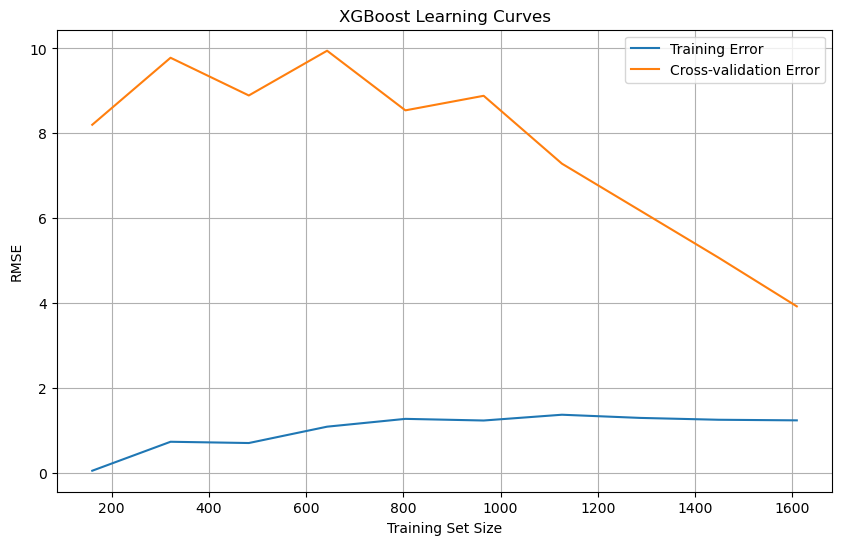

In [299]:
# Plot learning curves
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model_XG, X, y, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error'
    )
    
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    val_rmse = np.sqrt(-val_scores.mean(axis=1))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_rmse, label='Training Error')
    plt.plot(train_sizes, val_rmse, label='Cross-validation Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE')
    plt.title('XGBoost Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_learning_curves(best_model, X, y)


In [303]:
#Saves the model

joblib.dump(model , "recent_pipeline.pkl")

['recent_pipeline.pkl']

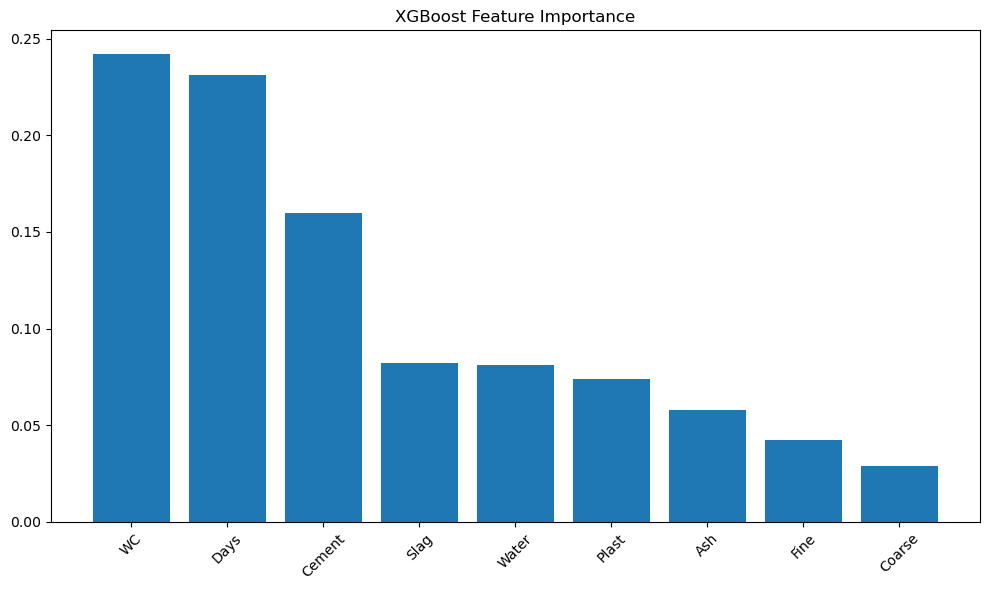

In [305]:
# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': best_model.named_steps['xgb'].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

From the above comparision of feature importance plot, this algorithm has given more emphasis on Water to Cement(WC) ratio than any other features, which shows the strength of concrete is highly co-related with the WC ratio as compare to other parameters.


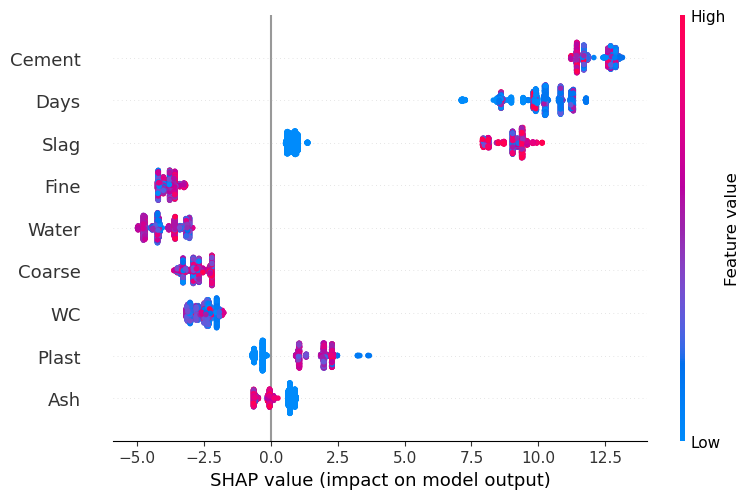

In [344]:
import shap
import matplotlib.pyplot as plt

xgb_model = best_model.named_steps['xgb']
# Ensure correct SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)

# Create summary dependence plot (scatter type)
shap.summary_plot(shap_values, X_train, plot_type="dot")

# Show plot
plt.show()

In [346]:
#Saving our model for future use(You can use joblib or pickle but we are using joblib here due to large numpy arrays)
from joblib import load, dump
# Save the model and scaler
dump(best_model, 'xgboost_model.joblib')
# To load and use the model later:
def load_and_predict(model_path, new_data):
    """
    Load the saved model and make predictions on new data
    Parameters:
    model_path (str): Path to the saved model file
    new_data (array-like): New data to make predictions on
    Returns:
    array: Predictions for the new data
    """
    # Load the saved model
    loaded_model = load(model_path)
    # Make predictions
    predictions = loaded_model.predict(new_data)
    return predictions



In [348]:
# Function to validate input data
# But now let's give a certain range for each parameters, so that the input data doesn't go out of bound to predict some outliers 
# and our strength value doesn't get overshoot or undershoot.
def validate_concrete_data(data):
    """
    Validate that input data is within reasonable ranges for concrete mixing
    """ #This range are provided based upon the training set as a reference point for maximum and minimum.
    valid_ranges = {
        'Cement': (100, 540),
        'Slag': (0, 360),
        'Ash': (0, 200),
        'Water': (120, 247),
        'Plast': (0, 32),
        'Coarse': (750, 1145),
        'Fine': (550, 995),
        'Days': (1, 365)
    }
    # Initialize report
    report = {
        'is_valid': True,
        'missing_columns': [],
        'out_of_range_details': {},
        'summary': ''
    }
    
    for column, (min_val, max_val) in valid_ranges.items():
        if column in data.columns:
            mask = (data[column] < min_val) | (data[column] > max_val)
            invalid_values = data.loc[mask, column]
            if not invalid_values.empty:
                report['is_valid'] = False
                report['out_of_range_details'][column] = {
                    'valid_range': (min_val, max_val),
                    'invalid_rows': invalid_values.index.tolist(),
                    'invalid_values': invalid_values.tolist()
                }
                # Add to summary
                report['summary'] += f"\n{column}:\n"
                report['summary'] += f"Valid range: {min_val} to {max_val}\n"
                report['summary'] += f"Found {len(invalid_values)} invalid values:\n"
                for idx, val in zip(invalid_values.index, invalid_values):
                    report['summary'] += f"Row {idx}: {val:.2f}\n"
    # Check for missing columns
    missing = [col for col in valid_ranges.keys() if col not in data.columns]
    if missing:
        report['is_valid'] = False
        report['missing_columns'] = missing
        report['summary'] += f"Missing columns: {', '.join(missing)}\n"
    # Add final summary
    if report['is_valid']:
        report['summary'] = "All values are within valid ranges."
    else:
        report['summary'] = "VALIDATION FAILED:\n" + report['summary']
    return report
def validate_and_report(data):
    report = validate_concrete_data(data)
    print("\n=== Concrete Mixture Validation Report ===")
    print(report['summary'])
    print("\nOverall Status:", "VALID" if report['is_valid'] else "INVALID")
    print("=====================================")
    return report['is_valid']


In [350]:
validate_and_report(new_data_raw)


=== Concrete Mixture Validation Report ===
All values are within valid ranges.

Overall Status: VALID


True

In [352]:
def ex_prediction(new_data_raw):
    joblib_predictions = load_and_predict('xgboost_model.joblib', new_data_raw)
    return joblib_predictions
multiple = ex_prediction(new_data_raw)
for i, pred in enumerate(multiple):
        print(f"Sample {i+1} Predicted Strength: {pred:.2f} MPa")

Sample 1 Predicted Strength: 53.49 MPa
Sample 2 Predicted Strength: 51.46 MPa


We passed new datas to our model and it succesfully gave us the strength of concrete based on the given parameters.

In [378]:
def update_xgboost_model(existing_model_path, new_data_path, output_model_path=None):
    try:
        # Load existing pipeline
        model = joblib.load(existing_model_path)

        # Load new data
        new_data = pd.read_csv(new_data_path)

        # Ensure columns match (using a more robust check)
        expected_cols = model.named_steps['scaler'].get_feature_names_out().tolist() # Get feature names from the scaler
        if not all(col in new_data.columns for col in expected_cols):
            raise ValueError("New data columns do not match existing model's expected columns.")
        if 'Mpa' not in new_data.columns:
            raise ValueError("Target column 'Mpa' is missing from the new data.")
        X_new = new_data[expected_cols]
        y_new = new_data['Mpa']
        
        #    If you have the original data, load it here.
        try:
            original_data = pd.read_csv("path/to/original/training_data.csv") # Replace with the actual path
            X_original = original_data[expected_cols]
            y_original = original_data['Mpa']

            # 2. Combine original and new data
            X_combined = pd.concat([X_original, X_new], axis=0)
            y_combined = pd.concat([y_original, y_new], axis=0)
        except FileNotFoundError:
            print("Original training data not found. Updating model with only the new data.")
            X_combined = X_new
            y_combined = y_new

        # 3. Split the *combined* data
        X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
            X_combined, y_combined, test_size=0.2, random_state=42
        )
        
        # Get the XGBoost model and scaler from the pipeline
        xgb_model = model.named_steps['xgb']
        scaler = model.named_steps['scaler']

        # Scale the data
        X_train_scaled = scaler.transform(X_train_combined)
        X_test_scaled = scaler.transform(X_test_combined)

        # Fit on the *combined* data
        xgb_model.fit(
            X_train_scaled,
            y_train_combined,
            eval_set=[(X_test_scaled, y_test_combined)],  # Use combined test set
            verbose=False # Set verbose to False to suppress output
        )

        if output_model_path is None:
            output_model_path = existing_model_path
        joblib.dump(model, output_model_path)  # Save the *entire pipeline*

        y_pred_train = model.predict(X_train_combined)  # Predict on combined training data
        y_pred_test = model.predict(X_test_combined)    # Predict on combined test data

        metrics = {
            'train_rmse': np.sqrt(mean_squared_error(y_train_combined, y_pred_train)),
            'test_rmse': np.sqrt(mean_squared_error(y_test_combined, y_pred_test)),
            'train_r2': r2_score(y_train_combined, y_pred_train),
            'test_r2': r2_score(y_test_combined, y_pred_test)
        }

        return model, metrics

    except Exception as e:
        print(f"Error during model update: {str(e)}")
        return None, None
